In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing, model_selection

from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("data/datasetayah.csv", index_col="NO")
df.drop(columns=["Responden"], inplace=True)
df.head()

,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,...,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,Parenting_style
NO,,,,,,,,,,,,,,,,,,,,,
1,4,2,3,1,2,3,3,3,3,3,...,4,3,1,4,1,2,4,1,1,Authoration
2,4,3,4,5,4,4,5,2,3,5,...,2,3,2,3,4,3,2,2,1,Authorative
3,4,4,4,5,4,4,5,3,1,1,...,4,3,4,4,4,4,4,3,3,Authorative
4,1,3,2,4,2,3,5,3,1,3,...,5,2,4,3,3,3,5,5,4,Permissive
5,3,4,5,4,3,4,5,3,4,5,...,5,1,4,3,4,3,4,4,3,Authorative


In [3]:
df.Parenting_style.value_counts()

Authorative    69
Permissive     68
Authoration    63
Name: Parenting_style, dtype: int64

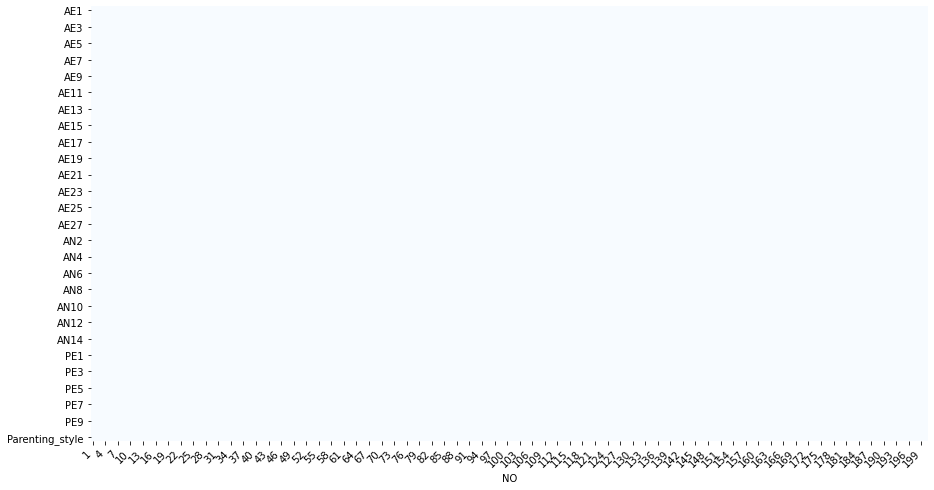

In [4]:
plot_missing_value(df) #cek data bolong / missing value

In [5]:
X = df.drop(['Parenting_style'], axis = 1) #data target atau label nya adalah clas yaitu curang atau tidak curang
X = np.array(X)
y = df['Parenting_style']

In [6]:
df = shuffle(df)

i = 8
df_to_predict = df[:i].reset_index(drop = True)
predict_ps = df_to_predict.Parenting_style 
predict_ps = np.array(predict_ps)
prediction = np.array(df_to_predict.drop(['Parenting_style'],axis= 1))

df = df[i:].reset_index(drop = True)

In [8]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [9]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,y,test_size = 0.2, random_state = 0)

In [10]:
train_x

array([[4, 4, 3, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 3],
       [4, 1, 4, ..., 4, 3, 4],
       ...,
       [4, 5, 5, ..., 5, 3, 4],
       [5, 4, 5, ..., 3, 4, 4],
       [4, 3, 4, ..., 5, 4, 4]], dtype=int64)

In [13]:
input_dim = len(df.columns) - 1

model = Sequential()
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 200, batch_size = 5)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 1.7664 - accuracy: 0.4500
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.6187
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8106 - accuracy: 0.5875
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6812
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7563
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6625
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7812
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7750
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8062
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7625
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9625
Epoch 84/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9812
Epoch 85/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9750
Epoch 86/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9563
Epoch 87/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9688
Epoch 88/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 89/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9688
Epoch 90/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9875
Epoch 91/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.9438
Epoch 92/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.9563
Epoch 93/200


32/32 [==============================] - 0s 2ms/step - loss: 2.8550e-04 - accuracy: 1.0000
Epoch 164/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.9625
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 166/200
32/32 [==============================] - 0s 1ms/step - loss: 2.6813e-04 - accuracy: 1.0000
Epoch 167/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.9438
Epoch 168/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9625
Epoch 169/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 170/200
32/32 [==============================] - 0s 1ms/step - loss: 1.8314e-04 - accuracy: 1.0000
Epoch 171/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.9750
Epoch 172/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy:

In [14]:
from jcopml.plot import plot_confusion_matrix

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

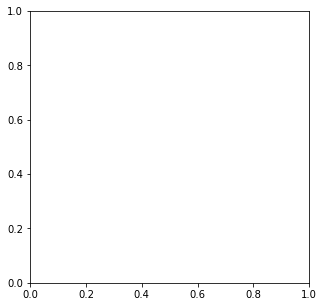

In [15]:
plot_confusion_matrix(train_x, test_x, train_y, test_y, model)